In [ ]:
from importlib import reload

from matplotlib import pyplot as plt
import jax
from jax import numpy as jnp
jax.config.update("jax_enable_x64", True)

import nudging
reload(nudging)

import separate
import simultaneous

reload(separate)
reload(simultaneous)

jndarray = jnp.ndarray

simulate_separate = nudging.simulate_separate
simulate_simultaneous = nudging.simulate_simultaneous

plot_error = nudging.plot_error

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1, γ2
ds = jnp.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 5

t0, tf = 0, 200

# Full observations

## Separate

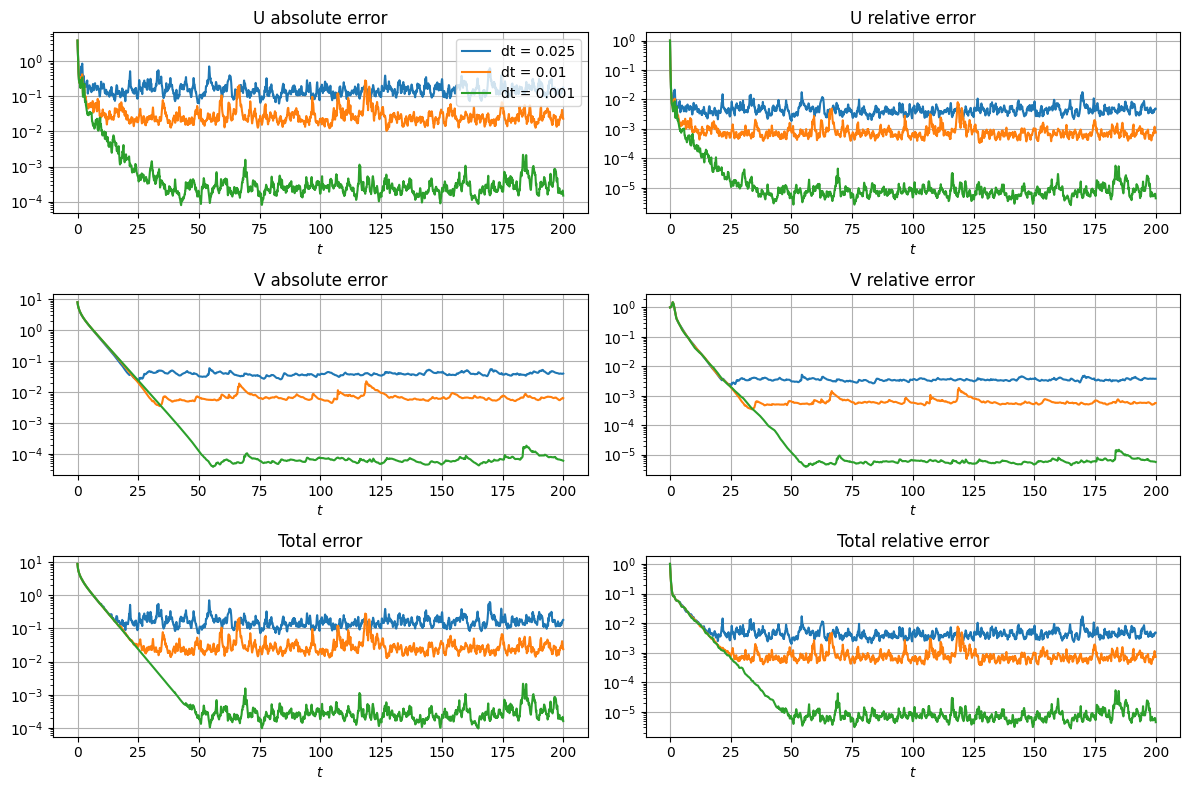

In [ ]:
system = separate.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = separate.RK4(system)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

for dt in (0.025, 0.01, 0.001):#, 0.0001):
    U, V, Un, Vn = simulate_separate(system, solver, t0, tf, dt)

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()

## Simultaneous

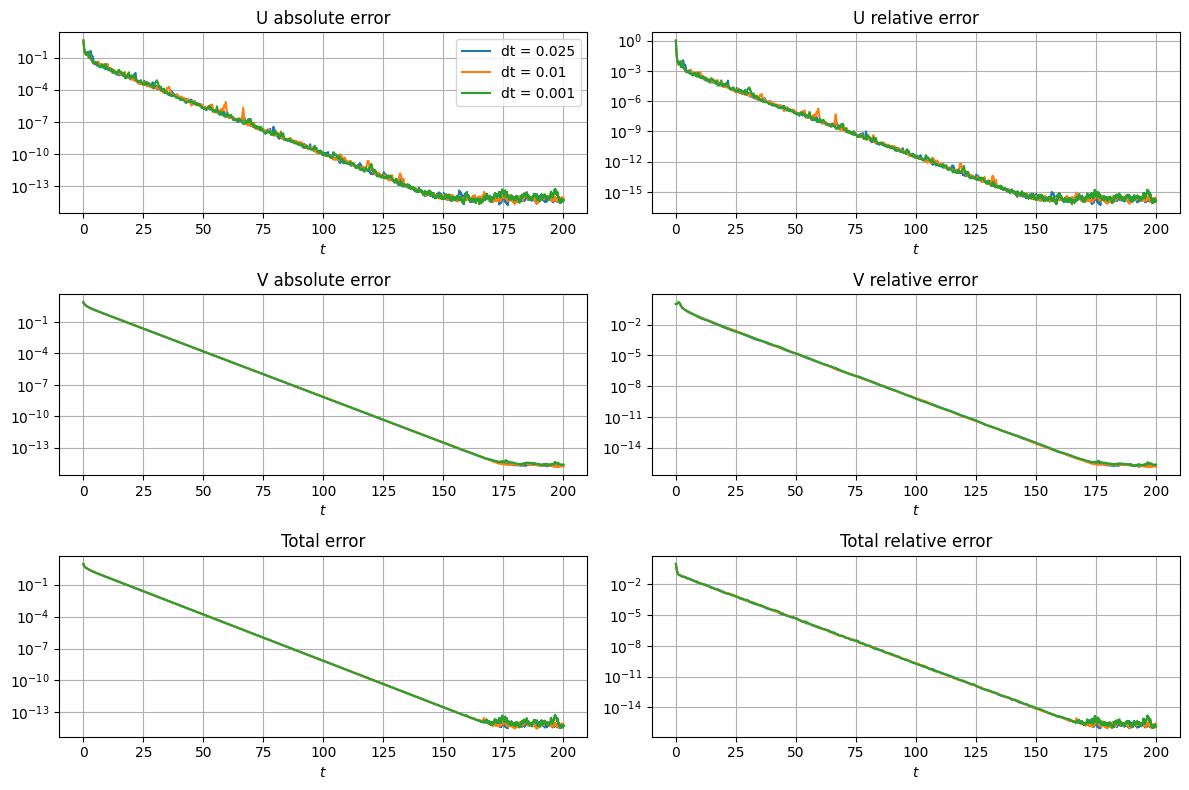

In [ ]:
system = simultaneous.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = simultaneous.RK4(system)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

for dt in (0.025, 0.01, 0.001):#, 0.0001):
    U, V, Un, Vn = simulate_simultaneous(system, solver, t0, tf, dt)

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()

### Experiment with different $\mu$ values

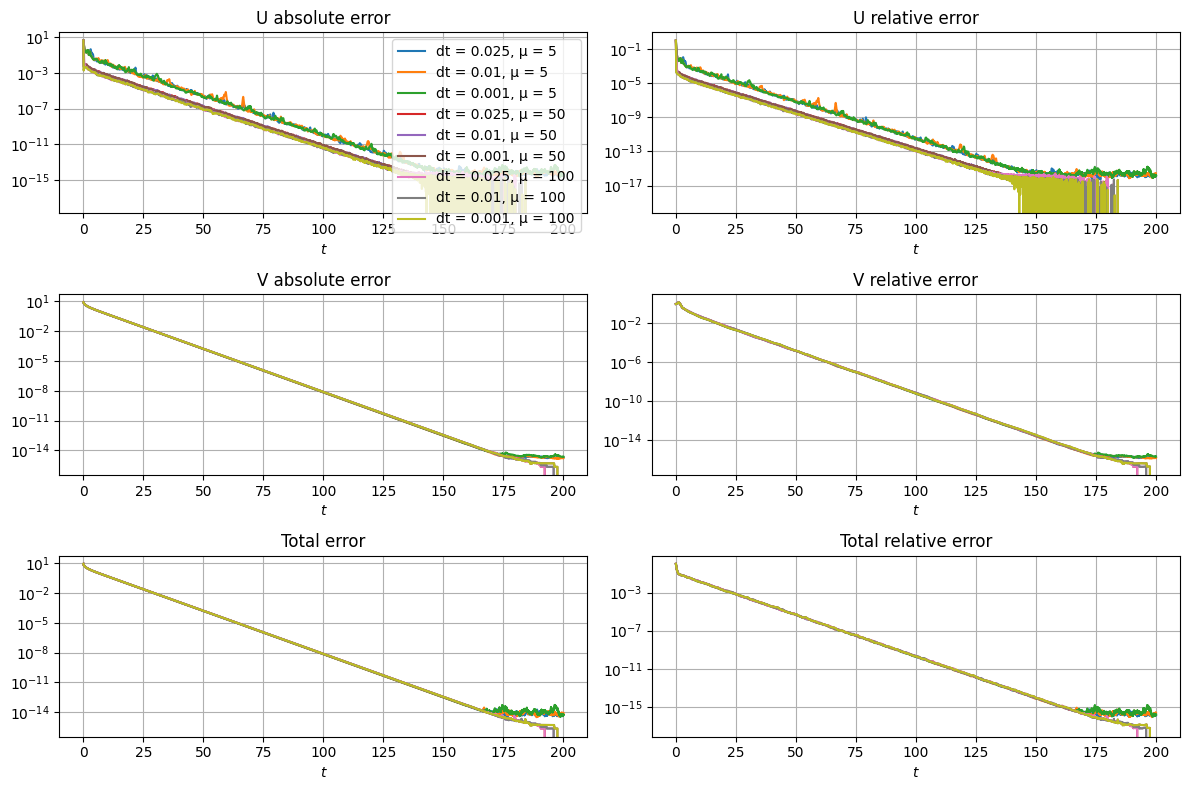

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

μs = (5, 50, 100)
dts = (0.025, 0.01, 0.001)

μ = μs[0]
system = simultaneous.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = simultaneous.RK4(system)
for dt in dts:
    U, V, Un, Vn = simulate_simultaneous(system, solver, t0, tf, dt)

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

μ = μs[1]
system = simultaneous.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = simultaneous.RK4(system)
for dt in dts:
    U, V, Un, Vn = simulate_simultaneous(system, solver, t0, tf, dt)

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

μ = μs[2]
system = simultaneous.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = simultaneous.RK4(system)
for dt in dts:
    U, V, Un, Vn = simulate_simultaneous(system, solver, t0, tf, dt)

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

# Add μ to legend
_, labels = axs[0, 0].get_legend_handles_labels()
repeated = [μ for μ in μs for _ in dts]
new_labels = [label + f", μ = {μ}" for label, μ in zip(labels, repeated)]
axs[0, 0].legend(labels=new_labels)

fig.tight_layout()
plt.show()